In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats


# 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [2]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')

In [3]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [6]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [7]:
# Summary statistics
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [9]:
#finding duplicate values
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [10]:
# removing the duplicate
df = df.drop_duplicates()

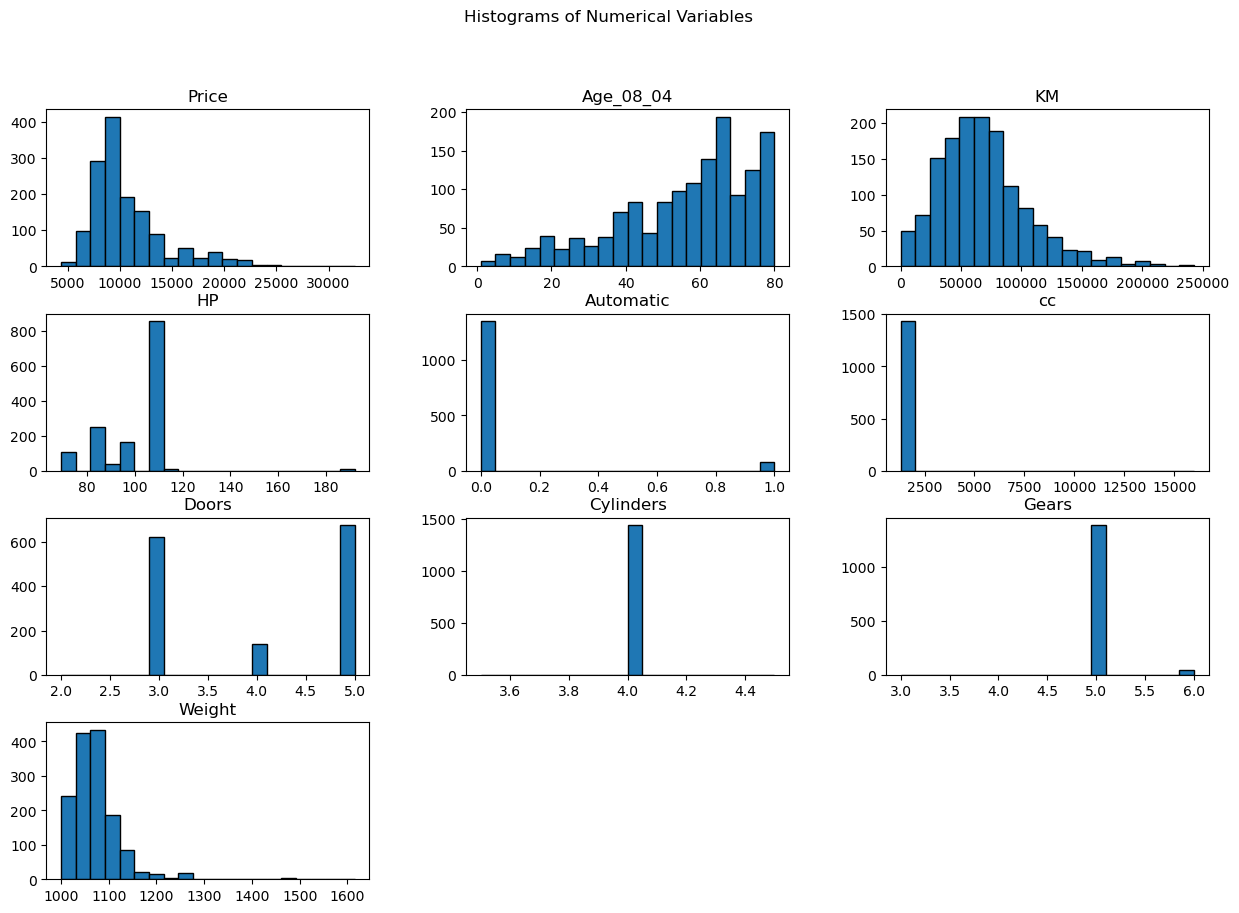

In [11]:
# Plot histograms for all numerical features
df.hist(bins=20, figsize=(15, 10), edgecolor='black',grid =False)
plt.suptitle('Histograms of Numerical Variables')
plt.show()

In [12]:
# Detecting and Handling Outliers
# Using Z-score to detect outliers
z_scores = np.abs(stats.zscore(df[['Price', 'KM', 'HP', 'Weight']]))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where Z-scores are < 3
print(f"Number of records after outlier removal: {len(df)}")

Number of records after outlier removal: 1370


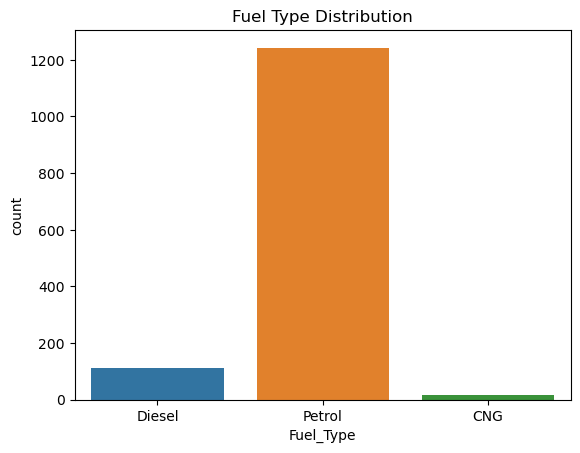

In [13]:
# Categorical Feature Analysis (Fuel_Type)
df['Fuel_Type'].value_counts()
# Visualize the distribution of Fuel_Type
sns.countplot(x='Fuel_Type', data=df)
plt.title('Fuel Type Distribution')
plt.show()

In [14]:
# One-Hot Encoding of Categorical Variable (Fuel_Type)
# Convert categorical variable 'Fuel_Type' to dummy/indicator variables
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [15]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


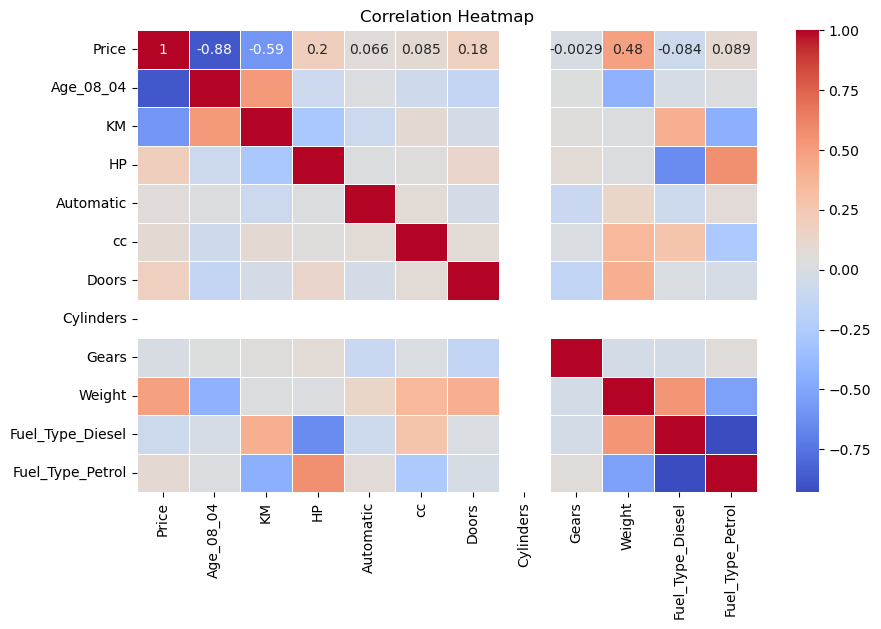

In [16]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

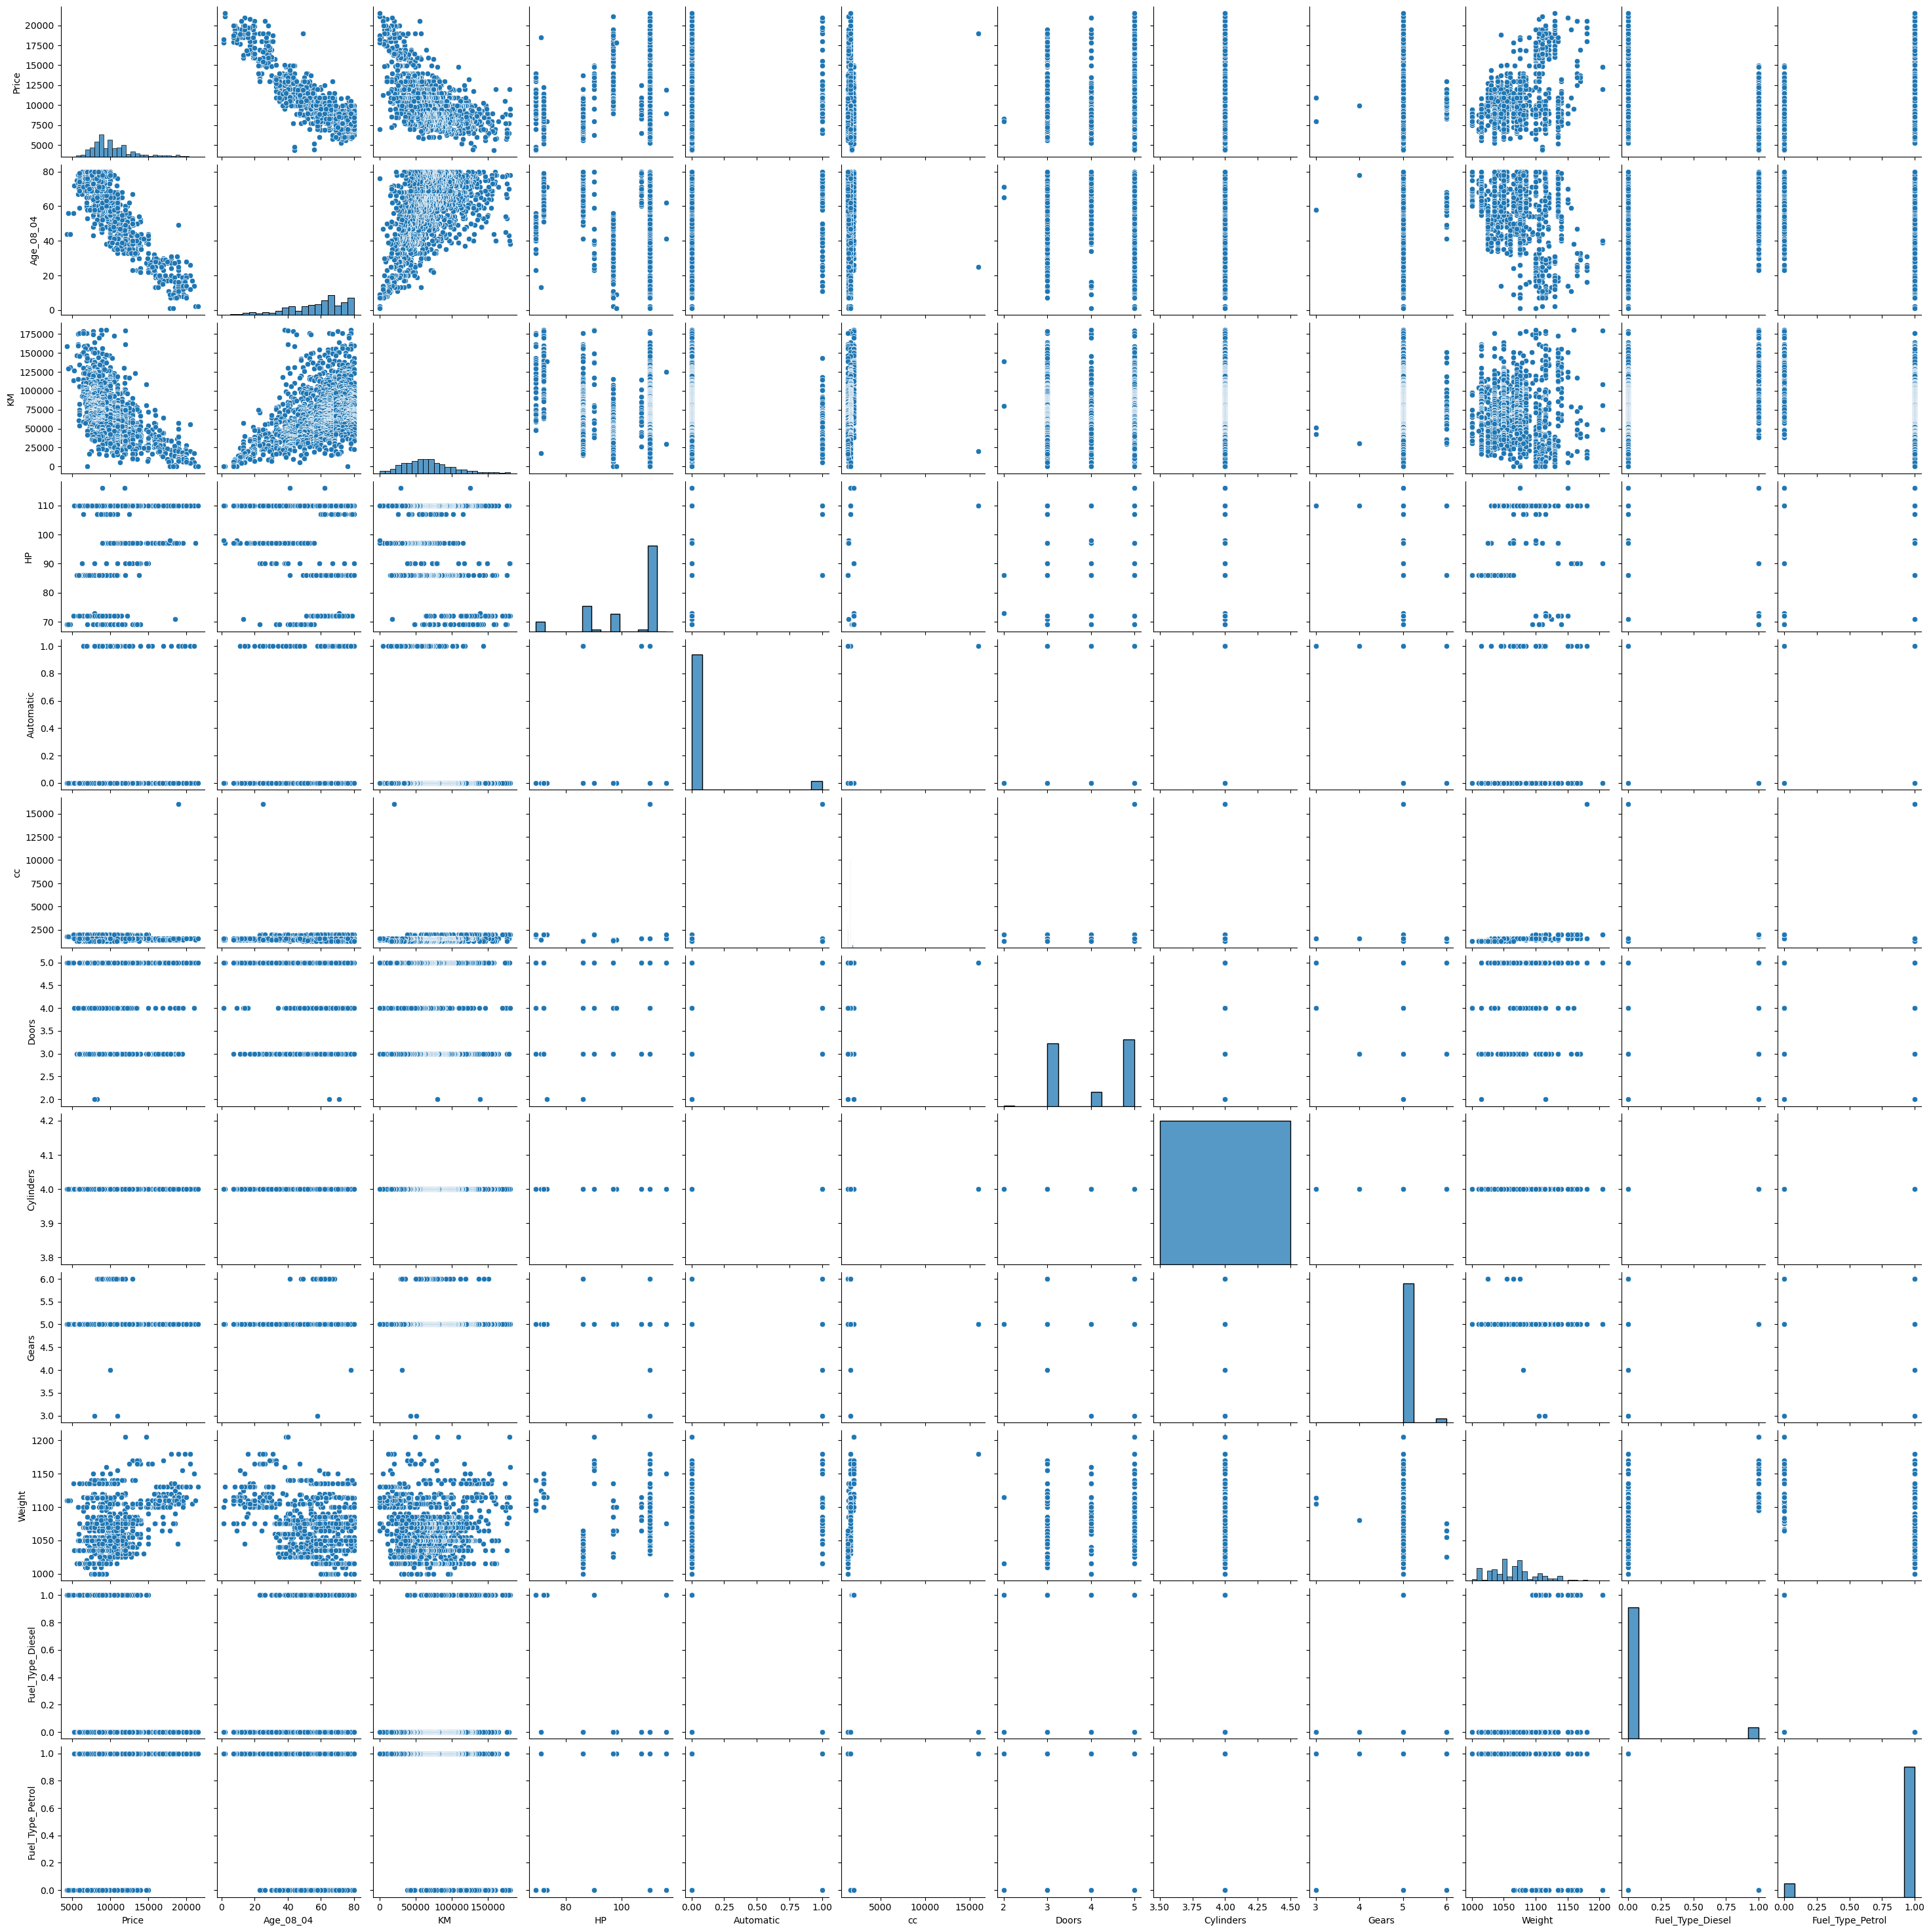

In [17]:
# Pair Plot
sns.pairplot(df)

# 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [24]:
x = df.drop('Price', axis=1)

In [28]:
y = df[['Price']]

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=100)

# 3.Build a multiple linear regression model using the training dataset. 

In [36]:
from sklearn.linear_model import LinearRegression

# Standard Multiple Linear Regression (All Features)

In [53]:
model1=LinearRegression()  
model1.fit(x_train,y_train)

LinearRegression()

In [66]:
# Predict the Price using the test set
y_pred1 = model1.predict(x_test)
y_pred1

array([10220.0477224 , 10594.94018137, 10261.41098503, 10625.69126541,
       10125.36292963, 10343.32812976, 10395.78516197, 10193.5249506 ,
       10633.4749496 , 10308.29410151, 10739.8737606 , 10303.01051558,
       11409.95033572, 10344.75870213, 10403.58350922, 10329.4037222 ,
       10499.7066359 , 10260.85480688, 10266.43909088, 10294.81386525,
       10463.90123996, 10254.41615267, 10691.1727938 , 10720.9104176 ,
       10616.09725534, 10765.56717108, 10446.30745709, 10677.4602097 ,
       10271.08512438, 10399.21084694, 10458.52260208, 10523.39608653,
       10250.34750988, 11261.7964524 , 10191.87298181, 10510.49853683,
       11570.475398  , 10226.7754189 , 10500.17324306, 10313.42783233,
       10371.75934837, 10666.18840124, 10500.69760267, 10368.62517935,
       10393.95478941, 10471.88876281, 10798.91203759, 10323.99102851,
       10188.45597326, 10634.32352963, 10185.45191785, 10695.04877272,
       10591.00918141, 10449.32987294, 10462.4565762 , 10232.43656381,
      

In [67]:
model1.intercept_

10186.533728649134

In [68]:
model1.coef_

array([ 4.26412535e+00, -1.83302468e-03, -1.89300531e+01, -4.14917292e+02,
        3.70110889e-02,  6.96229272e+01, -1.70530257e-12,  7.54953695e+01,
        2.32990523e+00, -1.55797662e+03, -1.10895242e+03])

# Multiple Linear Regression with Feature Selection

In [69]:

model2 = LinearRegression()

In [79]:
# Drop less important features (e.g., 'Cylinders' and 'Doors')
x_train_mod2 = x_train.drop(['Cylinders', 'Doors'], axis=1)
x_test_mod2 = x_test.drop(['Cylinders', 'Doors'], axis=1)

In [80]:
model2.fit(x_train_mod2,y_train)

LinearRegression()

In [81]:
# Predict the Price using the test set
y_pred2 = model2.predict(x_test_mod2)
y_pred2

array([10290.56919999, 10629.5474941 , 10242.78051785, 10657.22884153,
       10162.46570291, 10295.83587935, 10321.09641549, 10143.77354122,
       10673.61535478, 10259.85967266, 10689.66116197, 10362.54462159,
       11482.0404809 , 10295.44540353, 10373.31561031, 10366.33166746,
       10443.19896304, 10310.7291662 , 10407.68848165, 10241.51095384,
       10449.16372139, 10281.74357648, 10622.39002738, 10683.1066192 ,
       10646.84784395, 10719.91128065, 10566.32187553, 10714.99740961,
       10323.82678044, 10376.00896259, 10412.48359405, 10580.62838202,
       10309.52563764, 11316.19778066, 10135.27381468, 10547.4988359 ,
       11503.70416666, 10282.13948207, 10459.89396401, 10332.92177906,
       10308.69338225, 10611.65485718, 10525.40863333, 10303.14013188,
       10354.29560772, 10441.09717869, 10719.00087723, 10261.14758999,
       10216.87364719, 10664.86361294, 10213.78926416, 10749.93576539,
       10522.15236965, 10394.28482369, 10413.5801688 , 10305.24044312,
      

In [82]:
model2.coef_

array([ 4.87995003e+00, -1.72453971e-03, -1.99240299e+01, -4.69747472e+02,
        3.46593759e-02,  1.83961062e+01,  3.83696571e+00, -1.64865148e+03,
       -1.05755549e+03])

In [83]:
model2.intercept_

9172.587618676607

# 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [90]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [97]:
# Evaluate Model 1
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_test, y_pred1)
mae1 = mean_absolute_error(y_test, y_pred1)

print(f" Model 1\n MSE: {mse1}\n RMSE: {rmse1}\n R²: {r2_1}\n MAE: {mae1}")

 Model 1
 MSE: 7915853.729527862
 RMSE: 2813.5127029263367
 R²: -0.018262743788754587
 MAE: 2129.5089551749206


In [98]:
# Evaluate Model 2
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)

print(f" Model 2\n MSE: {mse2}\n RMSE: {rmse2}\n R²: {r2_2}\n MAE: {mae2}")

 Model 2
 MSE: 7913964.136416535
 RMSE: 2813.1768761342637
 R²: -0.01801967433194962
 MAE: 2126.4014149230247


# 5.Apply Lasso and Ridge methods on the model.

In [101]:
from sklearn.linear_model import Lasso, Ridge

In [130]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)
lasso_pred = lasso_model.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)  
ridge_model.fit(x_train, y_train)
ridge_pred = ridge_model.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print("Lasso MSE:", lasso_mse)
print("Ridge MSE:", ridge_mse)

Lasso MSE: 7914516.776851859
Ridge MSE: 7914438.141524339


# 1.What is Normalization & Standardization and how is it helpful?
Normalization in data-science refers to the process of scalling numeric features to a common range,typically between 0 and 1.
The goal of normalization is to bring all the features into a similer scale,which is perticularly important for algorithms that are sensitive to the scale of the features

Standardization in data-science refers to the process of transforming data in such a way that it has mean of 0 and standard deviation of 1.
This process is also known as z-score normalization

# 2.What techniques can be used to address multicollinearity in multiple linear regression?
Multicollinearity occurs when independent variables in a regression model are highly correlated with each other. 
This can cause issues in multiple linear regression, such as unstable coefficients estimates and difficulties in interpreting the importance of individual predictors.